## NBA dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('A:/Weekends prac/data1/Seasons_Stats.csv')

C:\Users\Rapt\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,3,5,6,7,21,22,23,26,27,28,29,30,31,33,34,36,37,40,41,43,44,45,46,47,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Y = df['PER']

In [4]:
list_col = ['Age', 'G', 'GS','PTS','PF', 'TOV','BLK','STL', 'AST', 'TRB','DRB','ORB','FT%', 'FTA', 'FT', 'eFG%','2P%','2PA', '2P','3P%','3PA','3P','FG%','FGA','FG','VORP','BPM','DBPM','OBPM','WS/48','WS','DWS','OWS','USG%','TOV%','BLK%','STL%','AST%','TRB%','DRB%','ORB%','FTr','3PAr','TS%','MP']

In [5]:
X = df.columns[df.isnull().any()]

In [6]:
df[X].isnull().sum()

Series([], dtype: float64)

In [7]:
df = df.drop(['blanl','blank2'], axis =1)

In [8]:
X_model = df[list_col]

In [9]:
X_model = X_model.drop(['GS'], axis =1)

In [10]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy ='mean', axis = 0)
X_model = imputer.fit_transform(X_model)
Y = imputer.fit_transform(Y.values.reshape((-1,1)))

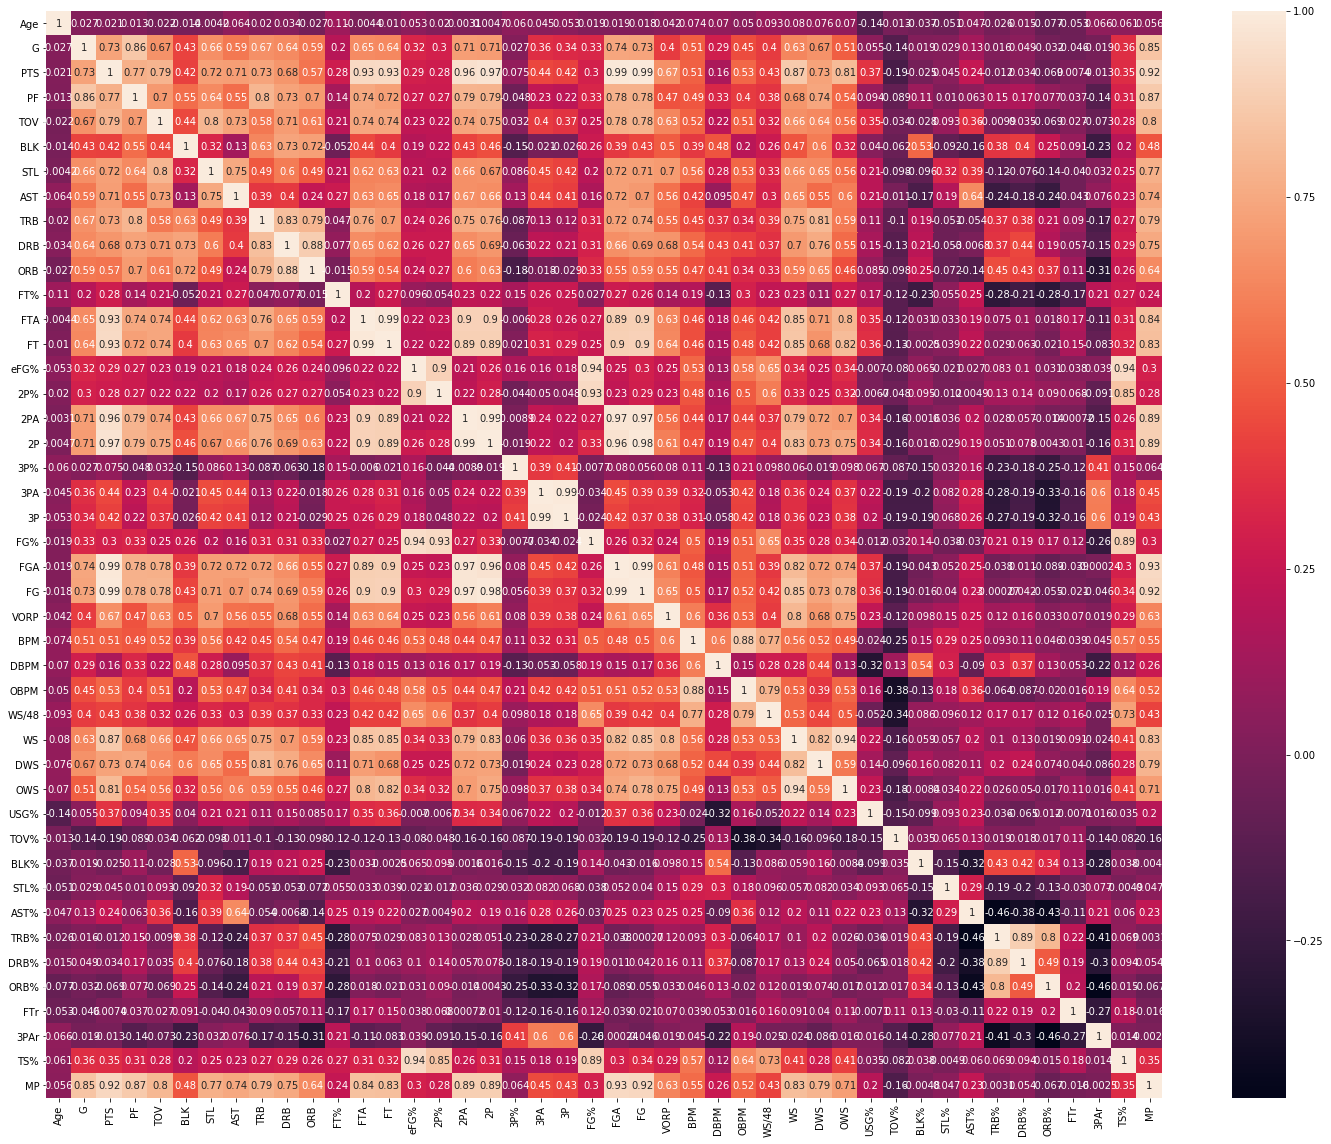

In [11]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (25,20))
X_n = pd.DataFrame(X_model, columns = ['Age', 'G','PTS','PF', 'TOV','BLK','STL', 'AST', 'TRB','DRB','ORB','FT%', 'FTA', 'FT', 'eFG%','2P%','2PA', '2P','3P%','3PA','3P','FG%','FGA','FG','VORP','BPM','DBPM','OBPM','WS/48','WS','DWS','OWS','USG%','TOV%','BLK%','STL%','AST%','TRB%','DRB%','ORB%','FTr','3PAr','TS%','MP'])
sns.heatmap(X_n.corr(), annot = True)

In [12]:
X_train,X_test = X_model[0:24037,:], X_model[24037:24633,:]
Y_train , Y_test = Y[0:24037,:], Y[24037:24633,:]

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
y_pred = (regressor.predict(X_test))

In [16]:
 Y_test,y_pred = np.round(Y_test, decimals =0), np.round(y_pred, decimals =0)

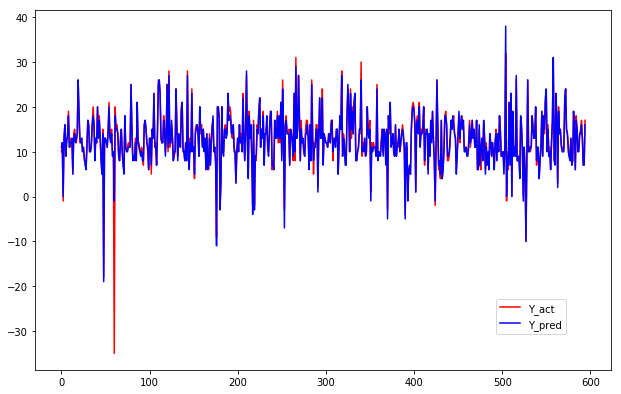

In [17]:
fig = plt.figure(figsize =(8,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(Y_test,color='red' , label = 'Y_act')
ax.plot(y_pred,color='blue', label='Y_pred')
ax.legend(loc=(0.8,0.1))

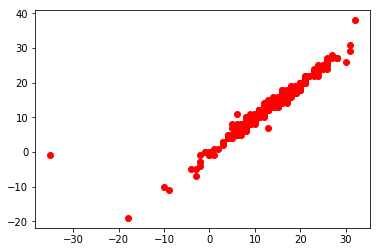

In [18]:
plt.scatter(Y_test,y_pred, color = 'red')

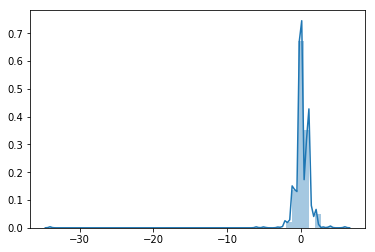

In [19]:
import seaborn as sns
%matplotlib inline
sns.distplot((Y_test-y_pred))


In [20]:
from sklearn import metrics
metrics.mean_absolute_error(Y_test, y_pred)

0.6151260504201681

In [21]:
metrics.mean_squared_error(Y_test, y_pred)

2.810084033613445

In [22]:
np.sqrt(metrics.mean_squared_error(Y_test, y_pred))

1.676330526362103

In [23]:
metrics.explained_variance_score(Y_test, y_pred)

0.9236065075800086